In [1]:
# ------------------------------------------------------------------------------------------------------
# Qantas Python Code Exercise
# Demonstatred how to write a scalable pythone code for a given problem
# Author: Dr Nikhil Chandra Sarkar, Sydney, Australia
# email: nikhil_cs48@yahoo.com
# Date: 09-09-2021
# ------------------------------------------------------------------------------------------------------

In [2]:
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Task 1: Write a Python function or module to calculate the average price (over all flights) for each month 
# in the dataset and combine this average price with the school holidays data.
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
# First save the given datasets to the current working directory 
# To know current working directory using the below codes
import os
os.getcwd()

'C:\\Users\\61470\\Dropbox\\Data Simulation Research Lab\\Python'

In [4]:
# Import required library for data processing, analysisng and visulaisation
import numpy as np               # For numeric data
import pandas as pd              # For datafarme 
import matplotlib.pyplot as plt  # For visualisation 

In [5]:
# Import data from current working ditrectory

airfaresData = pd.read_csv('airfares.csv') # airfares csv dataset
holidaysData = pd.read_csv('holidays.csv') # holidays csv dataset


In [6]:
# Create pandas DataFrame
airfaresData = pd.DataFrame(dict(airfaresData))
airfaresData.head()

,Date,ID,Price
0,1/01/2017,0,46.91
1,1/01/2017,1,68.12
2,1/01/2017,2,77.69
3,1/01/2017,3,57.44
4,1/01/2017,4,43.88


In [7]:
# Create 2 new columns to separate Month and Day from Date column
airfaresData.Date  = pd.to_datetime(airfaresData.Date)
airfaresData[['Month','Day']] = airfaresData.Date.apply(lambda x: pd.Series(x.strftime("%Y-%m,%d").split(",")))
airfaresData.head(10)


,Date,ID,Price,Month,Day
0,2017-01-01,0,46.91,2017-01,01
1,2017-01-01,1,68.12,2017-01,01
2,2017-01-01,2,77.69,2017-01,01
3,2017-01-01,3,57.44,2017-01,01
4,2017-01-01,4,43.88,2017-01,01
5,2017-01-01,5,79.62,2017-01,01
6,2017-01-01,6,60.54,2017-01,01
7,2017-01-01,7,74.68,2017-01,01
8,2017-01-01,8,56.82,2017-01,01
9,2017-01-01,9,81.24,2017-01,01


In [8]:
# Group data by Month
g = airfaresData.groupby(["Month"])

# For each month, calculate the average of the Price column and remane it as mAvgPrice (i.e., monthly average price)
monthly_averages = g.aggregate({"Price":np.mean})
monthly_averages = monthly_averages.rename(columns = {"Price": "mAvgPrice"})
monthly_averages.head(36)

,mAvgPrice
Month,
2017-01,60.886439
2017-02,62.441657
2017-03,75.915148
2017-04,62.040803
2017-05,64.526958
2017-06,63.081397
2017-07,61.424390
2017-08,58.813310
2017-09,68.830340


In [9]:
# Create DataFrame for holidaysData
holidaysData = pd.DataFrame(dict(holidaysData))
# Remove default index
holidaysData = holidaysData.set_index('Month') 
holidaysData.head(36)

,Term
Month,
2017-01,0
2017-02,0
2017-03,1
2017-04,0
2017-05,0
2017-06,2
2017-07,0
2017-08,0
2017-09,3


In [10]:
# Merge above two DataFrames to combine monthly average price with the school holidays data
mergeData = monthly_averages.merge(holidaysData, on = 'Month')
mergeData.head(100)


,mAvgPrice,Term
Month,,
2017-01,60.886439,0
2017-02,62.441657,0
2017-03,75.915148,1
2017-04,62.040803,0
2017-05,64.526958,0
2017-06,63.081397,2
2017-07,61.424390,0
2017-08,58.813310,0
2017-09,68.830340,3


In [11]:
# -------------------------------------------------------------------------------------------------------------
# Task 2: Build a model of the average monthly price 
# and use this model to forecast of the average monthly price for the period Jan-2022 and Dec-2022 inclusive.
# -------------------------------------------------------------------------------------------------------------

y =3.264148 x + 63.410810, r: 0.764968, r-sqaure: 0.585176, 
p-value: 0.000000, std-err: 0.471324 
Regression line with the scatterplot


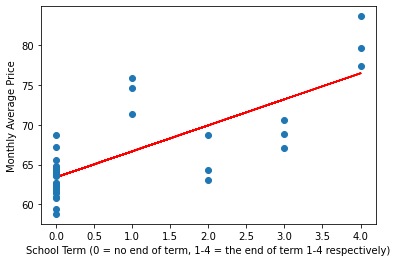

Using seaborn


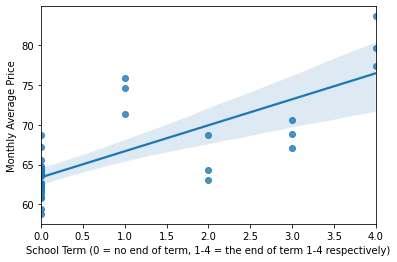

In [12]:
# Exporting the above merged DataFrame into a CSV file
mergeData.to_csv('Data.csv')

# Import/reload merged CSV data file
FullData = pd.read_csv('Data.csv')

# Import required library to calculate stats
from scipy import stats
y,x = FullData.mAvgPrice, FullData.Term

beta, beta0, r_value, p_value, std_err = stats.linregress(x,y)

print("y =%f x + %f, r: %f, r-sqaure: %f, \np-value: %f, std-err: %f "
       % (beta, beta0, r_value, r_value**2, p_value, std_err))
print("Regression line with the scatterplot")
# Regression line
yhat = beta * x + beta0

plt.plot(x, yhat, 'r-', x,y,'o')
plt.xlabel('School Term (0 = no end of term, 1-4 = the end of term 1-4 respectively)')
plt.ylabel('Monthly Average Price')
plt.show()

print("Using seaborn")
import seaborn as sns
sns.regplot(x = "Term", y ="mAvgPrice", data = FullData);
plt.xlabel('School Term (0 = no end of term, 1-4 = the end of term 1-4 respectively)')
plt.ylabel('Monthly Average Price')
plt.show()


In [13]:
# Generate Forcast DataFrame
columns =['Month', 'Term' ]
ForcastData = pd.DataFrame([['2022-01', 0], ['2022-02', 0], ['2022-03', 1], ['2022-04', 0], ['2022-05', 0],
                            ['2022-06', 2], ['2022-07', 0], ['2022-08', 0], ['2022-09', 3], ['2022-10', 0],
                            ['2022-11', 0], ['2022-12', 4]],
                           columns = columns 
                          )
ForcastData.head(12)

,Month,Term
0,2022-01,0
1,2022-02,0
2,2022-03,1
3,2022-04,0
4,2022-05,0
5,2022-06,2
6,2022-07,0
7,2022-08,0
8,2022-09,3
9,2022-10,0


In [14]:
# Forcast the average monthly price using developed linear regresson model for the peroid Jan-2022 to Dec-2022.

x = ForcastData['Term']
# Developed Forcast model
y = 3.264148*x + 63.410810
y

0     63.410810
1     63.410810
2     66.674958
3     63.410810
4     63.410810
5     69.939106
6     63.410810
7     63.410810
8     73.203254
9     63.410810
10    63.410810
11    76.467402
Name: Term, dtype: float64